In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn import model_selection

In [42]:
def compareAlgorithms(X_train, y_train):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        print(recall_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, f05_results, names

In [66]:
def compareCostSensitiveAlgorithms(X_train, y_train, weights):
    # Compare Algorithms
    import pandas
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.model_selection import StratifiedKFold
    from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
  
    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression(class_weight=weights)))
    models.append(('SVM', SVC(class_weight=weights)))
    models.append(('Linear SVC', LinearSVC(class_weight=weights)))
    models.append(('DT', DecisionTreeClassifier(class_weight=weights)))


    # evaluate each model in turn
    
    names = []
    precision_results=[]
    recall_results=[]
    f05_results=[]
    
    # make splits for cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=False)
    
    for name, model in models:
        names.append(name)

        # calculate scores
            
        precision_cv_results = model_selection.cross_val_score(model, X_train,
                                                               y_train, cv=skf, scoring='precision')
        recall_cv_results = model_selection.cross_val_score(model, X_train,
                                                            y_train, cv=skf, scoring='recall')
        f05_cv_results = model_selection.cross_val_score(model, X_train,
                                                         y_train, cv=skf, scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        print(precision_results)    # for testing only
        recall_results.append(recall_cv_results.mean())
        print(recall_results)    # for testing only
        f05_results.append(f05_cv_results.mean())
        print(f05_results)    # for testing only
        
        
    return precision_results, recall_results, f05_results, names

In [4]:
def compareAlgorithmsRUS(X_train, y_train):
    from imblearn.under_sampling import RandomUnderSampler


    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    precision_results = []
    recall_results = []
    f05_results = []
    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False)
        
        imba_pipeline = make_pipeline(RandomUnderSampler(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        f05_results.append(f05_cv_results.mean())
        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    
    return precision_results, recall_results, f05_results,names

In [5]:
def compareAlgorithmsSMOTE(X_train, y_train):
    from imblearn.over_sampling import SMOTE


    # prepare configuration for cross validation test harness
    seed = 7

    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('SVM', SVC()))
    models.append(('Linear SVC', LinearSVC()))
    models.append(('DT', DecisionTreeClassifier()))


    # evaluate each model in turn
    precision_results = []
    recall_results = []
    f05_results = []
    names = []
        
    for name, model in models:
        skf = StratifiedKFold(n_splits=5, shuffle=False)
        
        imba_pipeline = make_pipeline(SMOTE(random_state=42), model)
        
        precision_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='precision')
        recall_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring='recall')
        f05_cv_results = model_selection.cross_val_score(imba_pipeline, X_train, y_train, cv=skf, 
                                                     scoring=f05_score)

        precision_results.append(precision_cv_results.mean())
        recall_results.append(recall_cv_results.mean())
        f05_results.append(f05_cv_results.mean())
        names.append(name)
        #msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        #print(msg)
        
    #print("Precision Results:", precision_results)    
    #print("Recall Results:",recall_results)
    #print("F05 Results:",f05_results)
    
    return precision_results, recall_results,f05_results, names

In [6]:
def barChart(results, score):
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots()
    algorithms = ['LR', 'SVM', 'Linear SVM', 'DT']
    ax.bar(algorithms,results)
    ax.set_ylabel(score)
    ax.set_title(score)
    plt.show()

In [7]:
def twoGroupsBarChart(results1, string1, results2, string2, score):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'SVM', 'Linear SVM', 'DT']

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, results1, width, label=string1)
    rects2 = ax.bar(x + width/2, results2, width, label=string2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

In [8]:
def threeGroupsBarChart(results1, string1, results2, string2, results3, string3, score):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np


    labels = ['LR', 'SVM', 'Linear SVM', 'DT']

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, results1, width, label=string1)
    rects2 = ax.bar(x, results2, width, label=string2)
    rects3 = ax.bar(x + width, results3, width, label=string3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(score)
    ax.set_title(score)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()

In [9]:
# Function to create a confusion matrix 
def conf_matrix(y_test, y_pred):    
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    confusion = metrics.confusion_matrix(y_test, y_pred)
    
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    disp  = skplt.metrics.plot_confusion_matrix(y_test, y_pred)
    disp.set_title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
# define f0.5 score
from sklearn.metrics import fbeta_score, make_scorer
f05_score = make_scorer(fbeta_score, beta=0.5)

# Cost insensitve learning results

In [59]:
# make feature matrix and target matrix
X = pd.read_csv("featuresMatrix_Preprocessed_OHEColumnsNamed.csv")
y = pd.read_csv("dependentVariableLGAEncoded.csv")


# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

#print(y.value_counts())
#print(y_train.value_counts())
#print(y_test.value_counts())

In [60]:
precision, recall, f05, names = compareAlgorithms(X_train, y_train)

[0.0]
[0.0]
[0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.06666666666666667]
[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.2]


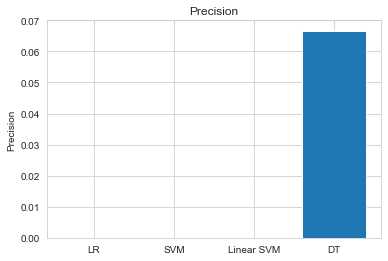

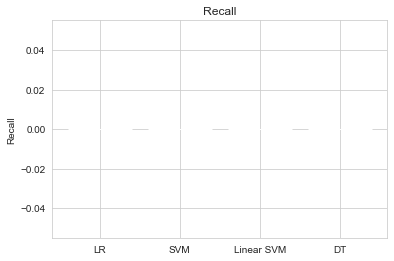

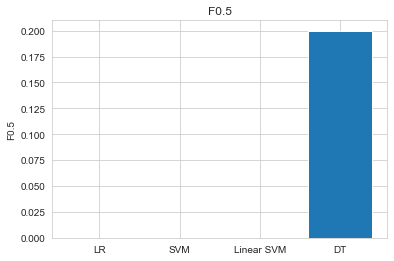

In [61]:
barChart(precision, "Precision")
barChart(recall, "Recall")
barChart(f05, "F0.5")

F0.5: 0.000
Recall: 0.000
Precision: 0.000


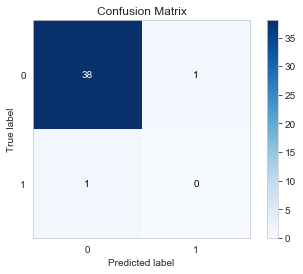

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.00      0.00      0.00         1

    accuracy                           0.95        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.95      0.95      0.95        40



In [62]:
# example of cost sensitive logistic regression for imbalanced classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)

# evaluate predictions
print('F0.5: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat)

# Cost Sensitive Learning Using class_weight='balanced'

In [67]:
cs_precision, cs_recall, cs_f05, names = compareCostSensitiveAlgorithms(X_train, y_train, 'balanced')

[0.06666666666666667]
[0.2]
[0.07692307692307691]
[0.06666666666666667, 0.2]
[0.2, 0.2]
[0.07692307692307691, 0.2]
[0.06666666666666667, 0.2, 0.0]
[0.2, 0.2, 0.0]
[0.07692307692307691, 0.2, 0.0]
[0.06666666666666667, 0.2, 0.0, 0.4]
[0.2, 0.2, 0.0, 0.4]
[0.07692307692307691, 0.2, 0.0, 0.4]


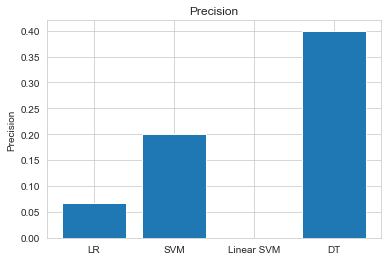

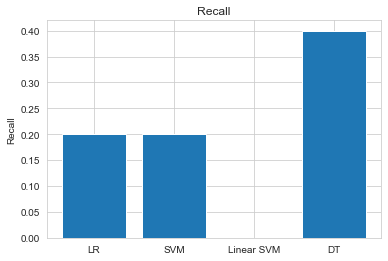

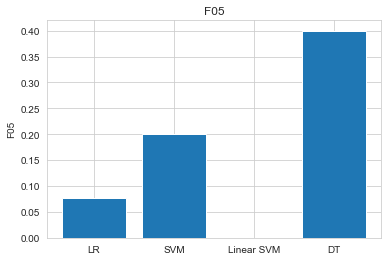

In [68]:
barChart(cs_precision, "Precision")
barChart(cs_recall, "Recall")
barChart(cs_f05, "F05")

F0.5: 0.000
Recall: 0.000
Precision: 0.000


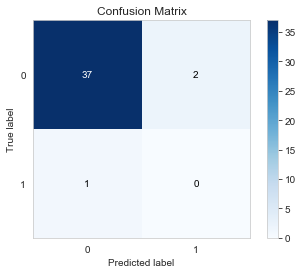

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.00      0.00      0.00         1

    accuracy                           0.93        40
   macro avg       0.49      0.47      0.48        40
weighted avg       0.95      0.93      0.94        40



In [71]:
# define model
model = LogisticRegression(solver='liblinear',class_weight='balanced')
# fit model
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
print('F0.5: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat)

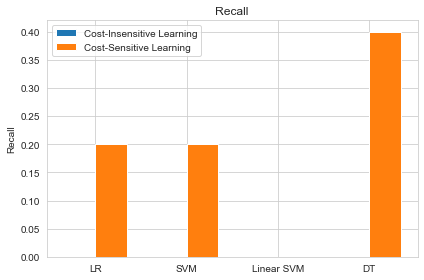

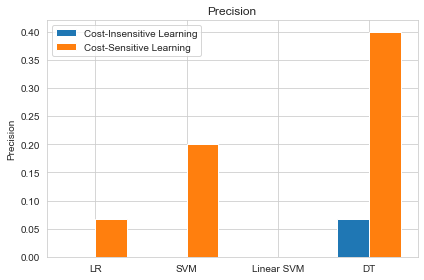

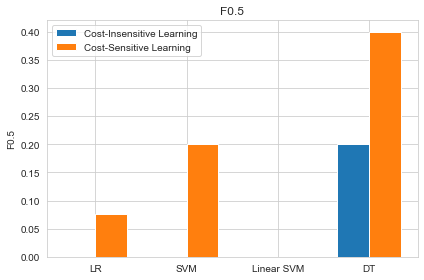

In [72]:
# plot cost sensitive vs. insensitive learning
twoGroupsBarChart(recall, "Cost-Insensitive Learning", cs_recall, "Cost-Sensitive Learning", "Recall")
twoGroupsBarChart(precision, "Cost-Insensitive Learning", cs_precision, "Cost-Sensitive Learning", "Precision")
twoGroupsBarChart(f05, "Cost-Insensitive Learning", cs_f05, "Cost-Sensitive Learning", "F0.5")

# Compare Cost Sensitive Learning with Data Resampling

In [73]:
sm_precision, sm_recall, sm_f05, names = compareAlgorithmsSMOTE(X_train, y_train)
rus_precision, rus_recall, rus_f05, names = compareAlgorithmsRUS(X_train, y_train)


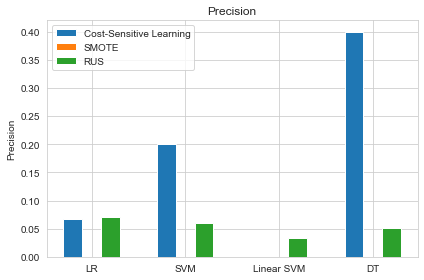

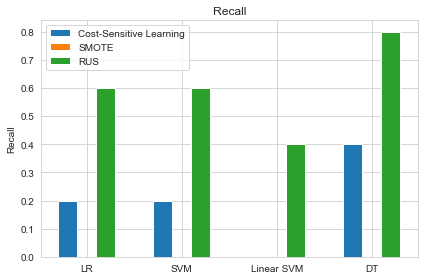

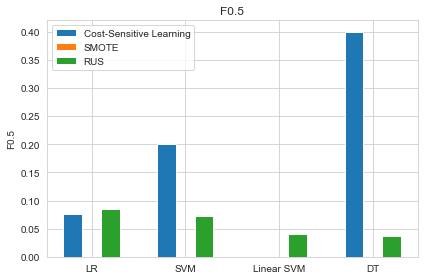

In [74]:
# compare Cost sensitive with SMOTE and RUS

threeGroupsBarChart(cs_precision, "Cost-Sensitive Learning",
                    sm_precision, "SMOTE",
                    rus_precision, "RUS",
                    "Precision")

threeGroupsBarChart(cs_recall, "Cost-Sensitive Learning",
                    sm_recall, "SMOTE", 
                    rus_recall, "RUS",
                    "Recall")

threeGroupsBarChart(cs_f05, "Cost-Sensitive Learning",
                    sm_f05, "SMOTE", 
                    rus_f05, "RUS",
                    "F0.5")

# Find Optimal Class Weights Using Grid Search

## LR

In [75]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(max_iter=5000)

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_lr = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'LR Scoring for different class weights')

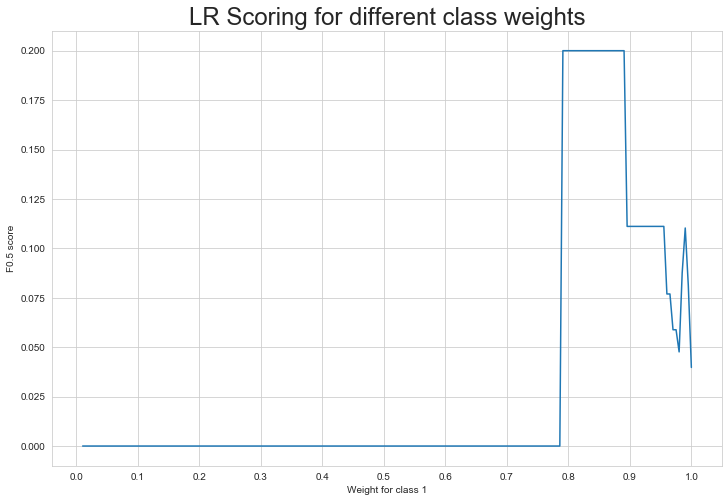

In [76]:
#Ploting the score for different values of weight
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch_lr.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F0.5 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('LR Scoring for different class weights', fontsize=24)

In [77]:
gridsearch_lr.best_params_

{'class_weight': {0: 0.10944723618090453, 1: 0.8905527638190954}}

In [78]:
optimal_weights = {0: 0.23381909547738694, 1:0.7661809045226131 }
optimal_weights

{0: 0.23381909547738694, 1: 0.7661809045226131}

F-Measure: 0.000
Recall: 0.000
Precision: 0.000


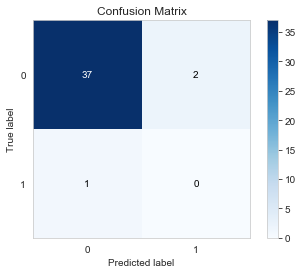

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.00      0.00      0.00         1

    accuracy                           0.93        40
   macro avg       0.49      0.47      0.48        40
weighted avg       0.95      0.93      0.94        40



In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.5389, 1: 6.915})
lr.fit(X_train, y_train)

# Predicting on the test data
yhat = lr.predict(X_test)

#Calculating and printing the f0.5 score 
print('F-Measure: %.3f' % fbeta_score(y_test, yhat, beta=0.5))
print('Recall: %.3f' % recall_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat))

conf_matrix(y_test, yhat)

## SVC

In [80]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model = SVC()
    
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_svc = GridSearchCV(estimator= model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'SVC scoring for different class weights')

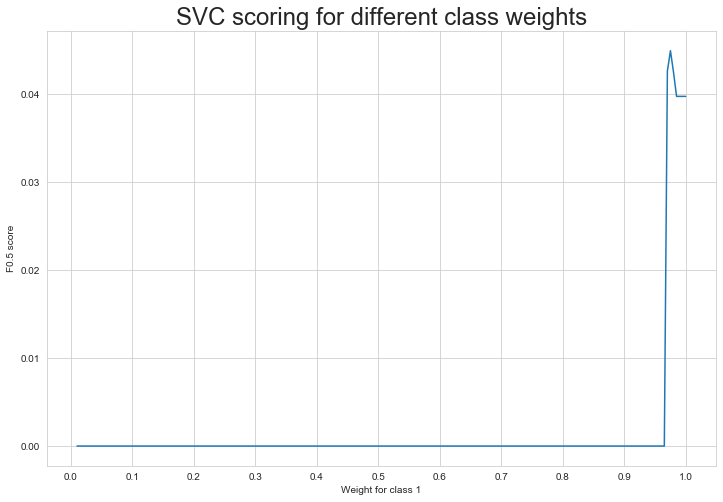

In [81]:
#Ploting the score for different values of weight
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch_svc.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F0.5 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('SVC scoring for different class weights', fontsize=24)

## Linear SVC

In [82]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model = LinearSVC()
    
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_linsvc = GridSearchCV(estimator= model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Linear SVC scoring for different class weights')

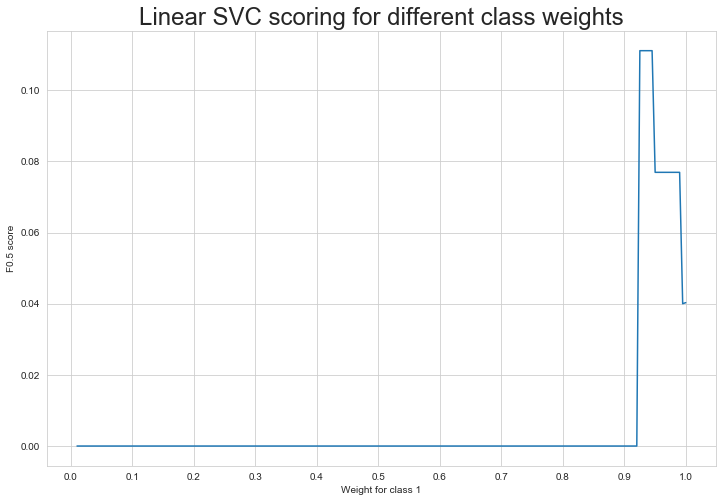

In [83]:
#Ploting the score for different values of weight
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch_linsvc.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F0.5 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Linear SVC scoring for different class weights', fontsize=24)

## DT

In [84]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
model = DecisionTreeClassifier()
    
#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch_dt = GridSearchCV(estimator= model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring=f05_score, 
                          verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'DT scoring for different class weights')

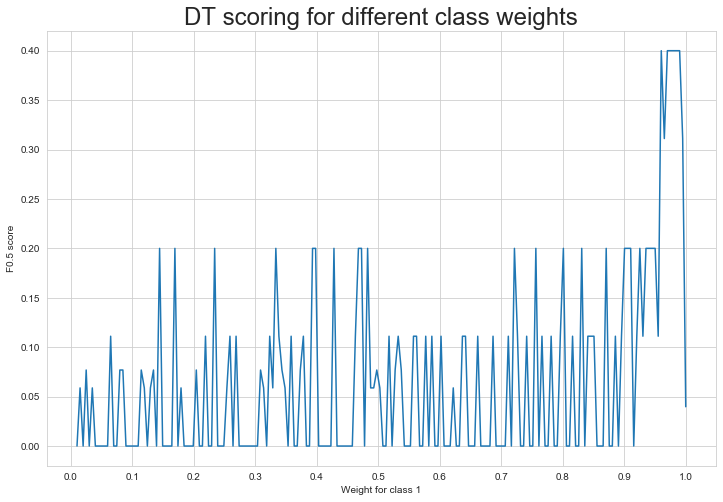

In [85]:
#Ploting the score for different values of weight
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch_dt.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F0.5 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('DT scoring for different class weights', fontsize=24)

In [86]:
gridsearch_lr.best_params_

{'class_weight': {0: 0.10944723618090453, 1: 0.8905527638190954}}

In [87]:
gridsearch_svc.best_params_

{'class_weight': {0: 0.024874371859296484, 1: 0.9751256281407035}}

In [88]:
gridsearch_linsvc.best_params_

{'class_weight': {0: 0.054723618090452265, 1: 0.9452763819095478}}

In [89]:
gridsearch_dt.best_params_

{'class_weight': {0: 0.009949748743718593, 1: 0.9900502512562814}}

In [38]:
cs2_precision, cs2_recall, cs2_f05, names = compareCostSensitiveAlgorithmsWithOptimalWeights(X_train, y_train)

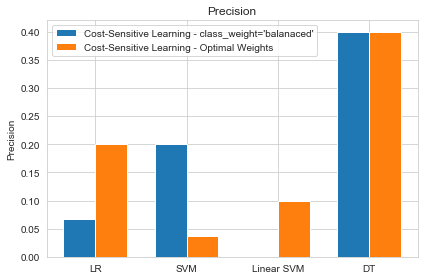

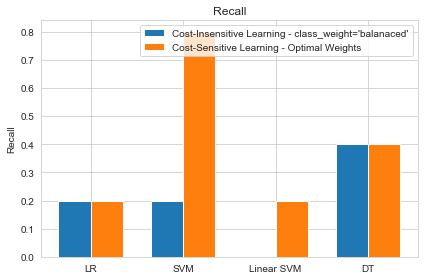

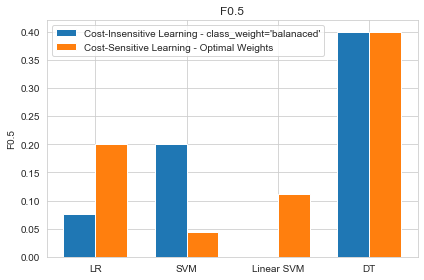

In [39]:
# plot cost sensitive with Optimal Weights vs. sensitive learning with class_weight='balanced'

twoGroupsBarChart(cs_precision, "Cost-Sensitive Learning - class_weight='balanaced'",
                 cs2_precision, "Cost-Sensitive Learning - Optimal Weights", "Precision")
twoGroupsBarChart(cs_recall, "Cost-Insensitive Learning - class_weight='balanaced'",
                 cs2_recall, "Cost-Sensitive Learning - Optimal Weights", "Recall")
twoGroupsBarChart(cs_f05, "Cost-Insensitive Learning - class_weight='balanaced'",
                 cs2_f05, "Cost-Sensitive Learning - Optimal Weights", "F0.5")

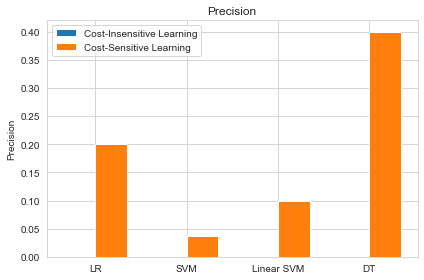

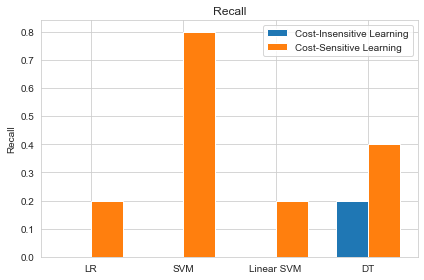

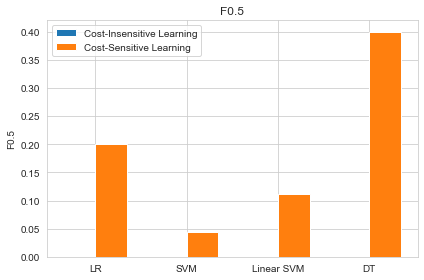

In [40]:
# plot cost sensitive with Optimal Weights vs. insensitive learning
twoGroupsBarChart(precision, "Cost-Insensitive Learning", cs2_precision, "Cost-Sensitive Learning", "Precision")
twoGroupsBarChart(recall, "Cost-Insensitive Learning", cs2_recall, "Cost-Sensitive Learning", "Recall")
twoGroupsBarChart(f05, "Cost-Insensitive Learning", cs2_f05, "Cost-Sensitive Learning", "F0.5")

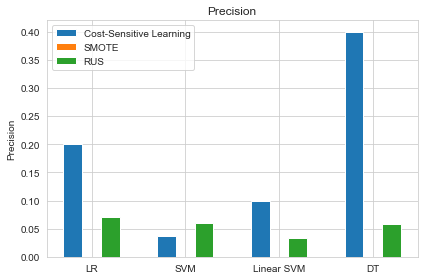

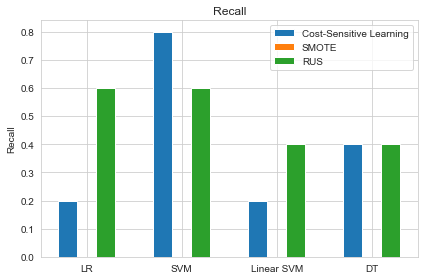

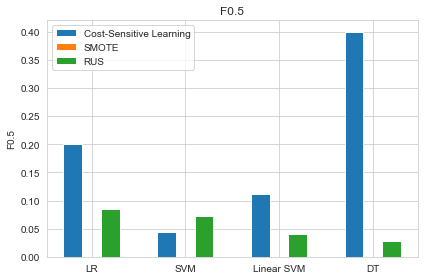

In [41]:
# plot cost sensitive with Optimal Weights vs. SMOTE and RUS

threeGroupsBarChart(cs2_precision, "Cost-Sensitive Learning",
                    sm_precision, "SMOTE",
                    rus_precision, "RUS",
                    "Precision")

threeGroupsBarChart(cs2_recall, "Cost-Sensitive Learning",
                    sm_recall, "SMOTE", 
                    rus_recall, "RUS",
                    "Recall")

threeGroupsBarChart(cs2_f05, "Cost-Sensitive Learning",
                    sm_f05, "SMOTE", 
                    rus_f05, "RUS",
                    "F0.5")